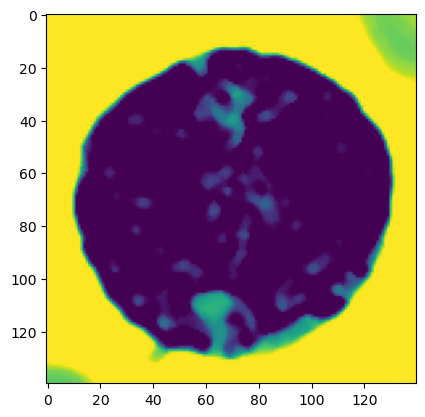

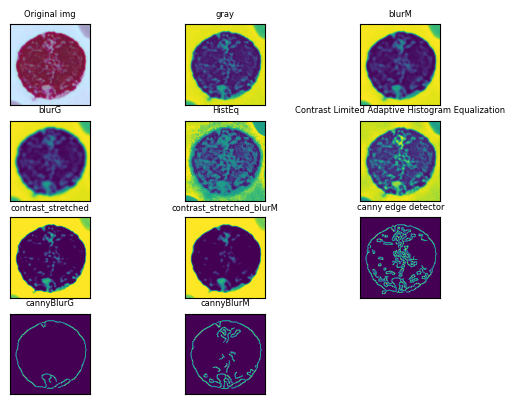

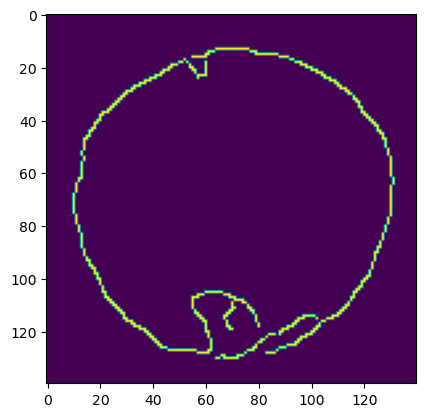

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Bild lesen, einfach das zu Testende einkommentieren
image = cv2.imread("basophil.jpg")
# image = cv2.imread("eosinophil.jpg")
# image = cv2.imread("erythroblast.jpg")
# image = cv2.imread("ig.jpg")
# image = cv2.imread("lymphocyte.jpg")
# image = cv2.imread("monocyte.jpg")
# image = cv2.imread("neutrophil.jpg")
# image = cv2.imread("platelet.jpg")

# OPTIONAL: Einfaches Cropping
image = image [110:250, 110:250]

# Konvertiere zu Grauskala Bild
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Glätten: Median Filter
blurM = cv2.medianBlur(gray, 5)

# Glätten: Gaussfilter 
blurG = cv2.GaussianBlur(gray, (9, 9), 0)

# Histogramm Anpassung 
histoNorm = cv2.equalizeHist(gray)

# CLAHE Objekt erstellen (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8))
claheNorm = clahe.apply(gray)

# Kontraststreckung
# Funktion mappt jeden Intensitätsgrad zum Ausgangs intensitätsgrad
def pixelVal(pix, r1, s1, r2, s2):
	if 0 <= pix and pix <= r1:
		return (s1 / r1) * pix
	elif r1 < pix and pix <= r2:
		return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
	else:
		return ((255 - s2) / (255 - r2)) * (pix - r2) + s2
	
# Parameter definieren

r1 = 70
s1 = 0
r2 = 200
s2 = 255

# Vektorisieren: Funktion auf jeden Wert im Numpy array anwenden
pixelVal_vec = np.vectorize(pixelVal)

# Konstrast streckung anwenden
contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2)
contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2)
plt.imshow(contrast_stretched_blurM)
plt.show()

# Folgende Zeile schreibt das Bild optional noch in die Ordnerstruktur im GitLab/ Lokal
# cv2.imwrite('Final_Output_colour.png', contrast_stretched_blurM)

# Kantendetektierung mit "canny edge detector"
edge = cv2.Canny(gray, 100, 200)

edgeG = cv2.Canny(blurG, 100, 200)

edgeM = cv2.Canny(blurM, 100, 200)

# Folgende Zeile schreibt das Bild optional noch in die Ordnerstruktur im GitLab/ Lokal
# cv2.imwrite('Final_Output.png', edgeM)


# Bilder anzeigen
titles = ['Original img','gray','blurM','blurG','HistEq','Contrast Limited Adaptive Histogram Equalization','contrast_stretched','contrast_stretched_blurM','canny edge detector','cannyBlurG','cannyBlurM']
images = [image,gray,blurM,blurG, histoNorm,claheNorm ,contrast_stretched,contrast_stretched_blurM,edge,edgeG,edgeM ]
for i in range(len(titles)):
    plt.subplot(4,3, i+1),plt.imshow(images[i])
    plt.title(titles[i], fontsize=6)
    plt.xticks([]),plt.yticks([])

plt.show()

## CannyBlurG scheint das Ziel am Besten herauszustellen - ABER: Ist es auch das Beste zum Trainieren der Modelle??? 
plt.imshow(edgeG)
plt.show()